<h1>ML Variance Model that predicts daily volatility of stock using linear regression</h1>

gathering data from yfinance


In [9]:
import yfinance as yf
import numpy as np
import matplotlib as plt

ticker = yf.Ticker('AAPL')
data = yf.download('AAPL', start='2023-01-01', end='2024-11-25') #input desired stock ticker here
volume = ticker.info["averageVolume10days"]

data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-01-03,123.768456,125.070000,130.899994,124.169998,130.279999,112117500
2023-01-04,125.045044,126.360001,128.660004,125.080002,126.889999,89113600
2023-01-05,123.718979,125.019997,127.769997,124.760002,127.129997,80962700
2023-01-06,128.271103,129.619995,130.289993,124.889999,126.010002,87754700
2023-01-09,128.795609,130.149994,133.410004,129.889999,130.470001,70790800


</h2>calculate daily returns and volatility</h2>

In [10]:
# Calculate daily returns (returns list of percentage change for each day compared to previous)
data['Return'] = data['Adj Close'].pct_change()

# Calculate rolling variance (volatility) over a 20-day window
data['Volatility'] = data['Return'].rolling(window=20).var()

# Drop rows with NaN values resulting from calculations
data.dropna(inplace=True)

# Display the updated data
data[['Return', 'Volatility']].head()

Price,Return,Volatility
Ticker,,
Date,,
2023-02-01,0.007901,0.000163
2023-02-02,0.037063,0.000206
2023-02-03,0.024400,0.000195
2023-02-06,-0.017929,0.000195
2023-02-07,0.019245,0.000200


use previous day's volatility and moving average as features

In [11]:
# Feature 1: Previous day's volatility
data['Volatility_Lag1'] = data['Volatility'].shift(1)

# Feature 2: 20-day moving average of returns
data['MA_Return'] = data['Return'].rolling(window=20).mean()

# Drop any new NaN values (i.e. empty values)
data.dropna(inplace=True)

# Define feature matrix X and target vector y
X = data[['Volatility_Lag1', 'MA_Return']]
y = data['Volatility']

split data (use 80 20 ratio for training and testing)

In [12]:
from sklearn.model_selection import train_test_split

# Since it's time series, we'll split based on index
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


train using linear regression for simplicity

In [13]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

predict

In [14]:
# Predict volatility on the test set
y_pred = model.predict(X_test)

evaluate model

In [15]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
#rmse = root_mean_squared_log_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.6f}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

Mean Absolute Error (MAE): 0.000014


visualizing the data

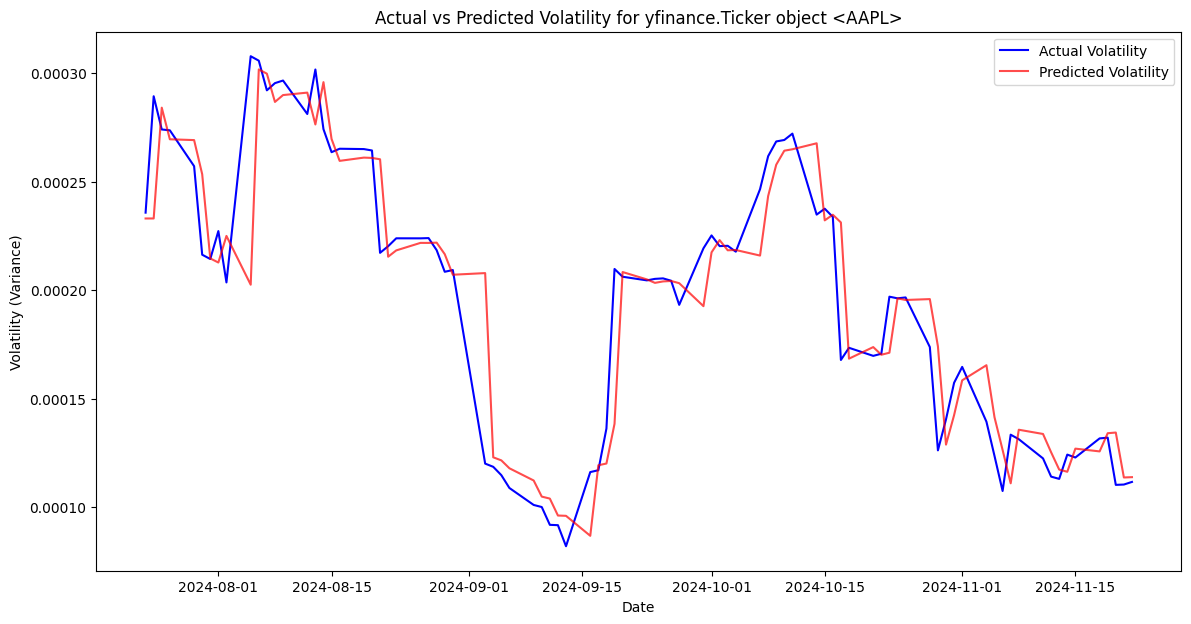

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(14,7))

# Plot actual volatility
plt.plot(y_test.index, y_test, label='Actual Volatility', color='blue')

# Plot predicted volatility
plt.plot(y_test.index, y_pred, label='Predicted Volatility', color='red', alpha=0.7)

# Add title and labels
plt.title(f'Actual vs Predicted Volatility for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volatility (Variance)')

# Show legend
plt.legend()

# Display the plot
plt.show()